In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,NaN,13.64,NaN,1.10,71.78,0.06,NaN,NaN,0.0
1,1.51761,NaN,3.60,1.36,72.73,0.48,7.83,0.00,NaN
2,1.51618,NaN,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,NaN,13.21,NaN,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,NaN,73.08,0.55,8.07,NaN,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,NaN,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,NaN,NaN,73.06,NaN,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,NaN,0.0
212,1.51651,14.38,0.00,1.94,NaN,0.00,8.48,NaN,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	30
float64		column 2	50
float64		column 3	43
float64		column 4	20
float64		column 5	53
float64		column 6	50
float64		column 7	53
float64		column 8	50
float64		column 9	23


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,184.000000,164.000000,171.000000,194.000000,161.000000,164.000000,161.000000,164.000000,191.000000
mean,1.518335,13.401159,2.702924,1.444485,72.701677,0.488659,8.919255,0.159451,0.055707
std,0.003067,0.774267,1.405941,0.490850,0.726198,0.540844,1.416769,0.499265,0.096553
min,1.511150,10.730000,0.000000,0.290000,70.160000,0.000000,5.430000,0.000000,0.000000
25%,1.516545,12.930000,2.260000,1.190000,72.370000,0.157500,8.300000,0.000000,0.000000
50%,1.517660,13.270000,3.470000,1.360000,72.780000,0.560000,8.610000,0.000000,0.000000
75%,1.519095,13.722500,3.580000,1.620000,73.100000,0.610000,9.130000,0.000000,0.095000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

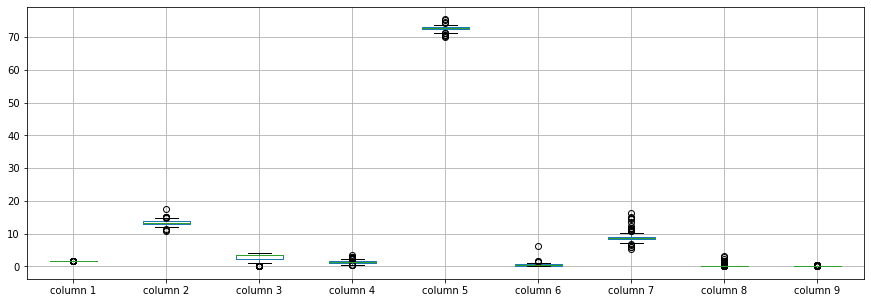

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518335
column 2    13.401159
column 3     2.702924
column 4     1.444485
column 5    72.701677
column 6     0.488659
column 7     8.919255
column 8     0.159451
column 9     0.055707
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.246795,-0.212346,-0.374191,-0.466243,-0.299972,0.855936,0.092502,0.178612
column 2,-0.246795,1.000000,-0.235470,0.205902,0.060263,-0.257295,-0.257890,0.156317,-0.219648
column 3,-0.212346,-0.235470,1.000000,-0.550257,-0.198365,0.444384,-0.404607,-0.473396,0.069601
column 4,-0.374191,0.205902,-0.550257,1.000000,0.092202,0.313863,-0.299495,0.499474,-0.060139
column 5,-0.466243,0.060263,-0.198365,0.092202,1.000000,-0.250604,-0.281564,0.064542,-0.064180
column 6,-0.299972,-0.257295,0.444384,0.313863,-0.250604,1.000000,-0.543572,0.089703,0.009742
column 7,0.855936,-0.257890,-0.404607,-0.299495,-0.281564,-0.543572,1.000000,-0.192220,0.088460
column 8,0.092502,0.156317,-0.473396,0.499474,0.064542,0.089703,-0.192220,1.000000,-0.023122
column 9,0.178612,-0.219648,0.069601,-0.060139,-0.064180,0.009742,0.088460,-0.023122,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [32]:
imputer = md.Midas(layer_structure = [9,9+78,9+78+78,9+78+78+78,9+78+78+78+78,9+78+78+78+78+78,9+78+78+78+78,9+78+78+78,9+78+78,9+78,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 78.07899064284105
Epoch: 1 , loss: 77.64341442401593
Epoch: 2 , loss: 77.07925825852614
Epoch: 3 , loss: 77.93499550452599
Epoch: 4 , loss: 77.9179458618164
Epoch: 5 , loss: 77.1177239051232
Epoch: 6 , loss: 77.60576512263371
Epoch: 7 , loss: 78.11632860623874
Epoch: 8 , loss: 77.78589982252855
Epoch: 9 , loss: 77.32691603440504
Epoch: 10 , loss: 77.91624039870042
Epoch: 11 , loss: 77.45230748103215
Epoch: 12 , loss: 78.01292888934796
Epoch: 13 , loss: 77.27476794903095
Epoch: 14 , loss: 77.6911007807805
Epoch: 15 , loss: 77.81816130418044
Epoch: 16 , loss: 77.13456550011269
Epoch: 17 , loss: 76.92190991915189
Epoch: 18 , loss: 76.39734825721153
Epoch: 19 , loss: 75.98427669818585
Epoch: 20 , loss: 76.00073594313402
Epoch: 21 , loss: 74.32095395601712
Epoch: 22 , loss: 75.25785886324368
Epoch: 23 , loss: 73.98908439049355
Epoch: 24 , loss: 73.56746497521034
Epoch: 25 , loss: 72.27654911921574
Epoch: 26 

In [33]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [34]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.519660
column 2    14.770000
column 3     3.750000
column 4     0.290000
column 5    19.250931
column 6     0.030000
column 7     9.000000
column 8     0.000000
column 9     0.000000
Name: 21, dtype: float64

In [35]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [36]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.385895,0.000000,-0.944542,0.000000,0.000000,0.000000,2.178572,0.277865,0.000000
1,0.000000,-3.343012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000246
2,0.000000,-4.488478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.085172,0.000000,-0.983268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,-0.022891,0.000000,0.000000,0.000000,0.224098,0.000000
...,...,...,...,...,...,...,...,...,...
209,0.000000,-6.855366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
210,0.000000,0.000000,1.918419,-1.220467,0.000000,0.295755,0.000000,0.000000,0.000000
211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.449165,0.000000
212,0.000000,0.000000,0.000000,0.000000,-54.962623,0.000000,0.000000,-1.474392,0.000000


Calculating NRMSE Value

In [37]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [38]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [39]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(270.8799491381327, 1090.4359815890969)

In [40]:
NRMS=numerator/denominator
NRMS


0.2484143532602237

In [41]:
new_df.iloc[66,:]

column 1     1.521520
column 2    13.050000
column 3     1.472980
column 4     0.637022
column 5    72.220000
column 6     0.128831
column 7     9.850000
column 8     0.146285
column 9     0.170000
Name: 66, dtype: float64

In [42]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.906905,13.640000,3.545458,1.100000,71.780000,0.060000,10.928572,0.277865,0.000000
1,1.517610,10.546988,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000246
2,1.516180,9.041522,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000
3,1.602832,13.210000,2.706732,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000
4,1.517420,13.270000,3.620000,1.217109,73.080000,0.550000,8.070000,0.224098,0.000000
...,...,...,...,...,...,...,...,...,...
209,1.516230,7.284634,0.000000,2.880000,72.610000,0.080000,9.180000,1.060000,0.000000
210,1.516850,14.920000,1.918419,0.769533,73.060000,0.295755,8.400000,1.590000,0.000000
211,1.520650,14.360000,0.000000,2.020000,73.420000,0.000000,8.440000,0.190835,0.000000
212,1.516510,14.380000,0.000000,1.940000,18.647377,0.000000,8.480000,0.095608,0.000000


In [43]:
imputations[-1].to_excel("Glass_NG_20(imp).xlsx", index=False, header=False)